1683381364561
[{'id': '0xc2c53acbff55', 'name': 'sensor2', 'description': 'polito laberarory', 'latitude': '45.4643', 'longitude': '9.1895', 'lastDetection': '1683297044984'}, {'id': '0xc2c53acbff55', 'name': 'sensor1', 'description': 'valentino park torino', 'latitude': '45.4643', 'longitude': '9.1895', 'lastDetection': '1683296990249'}, {'id': '0xc2c53acbff55', 'name': 'sensor3', 'description': 'on top of building', 'latitude': '45.4643', 'longitude': '9.1895', 'lastDetection': '1683296937250'}]
['0xc2c53acbff55', '0xc2c53acbff55', '0xc2c53acbff55']


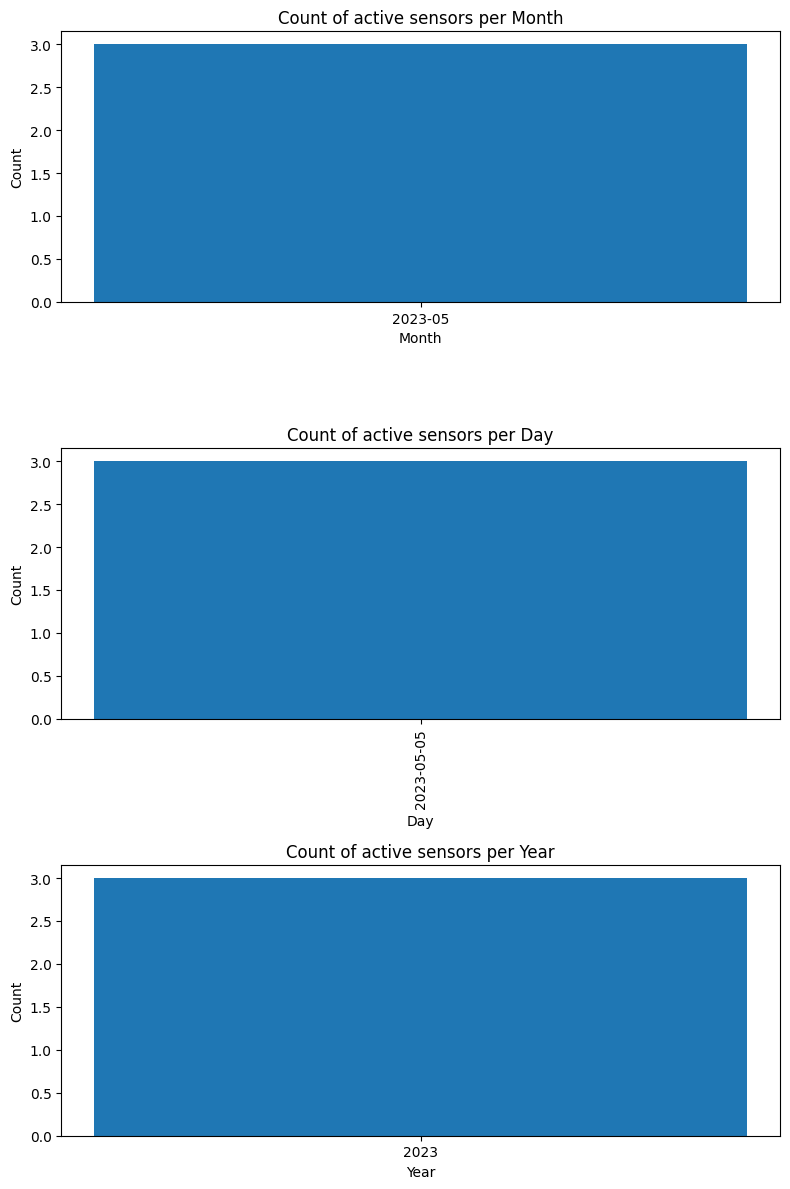

[1683296928217, 1683296929218, 1683296930223, 1683296931229, 1683296932233, 1683296933235, 1683296934239, 1683296935244, 1683296936249, 1683296937250, 1683296928217, 1683296929218, 1683296930223, 1683296931229, 1683296932233, 1683296933235, 1683296934239, 1683296935244, 1683296936249, 1683296937250, 1683296928217, 1683296929218, 1683296930223, 1683296931229, 1683296932233, 1683296933235, 1683296934239, 1683296935244, 1683296936249, 1683296937250]


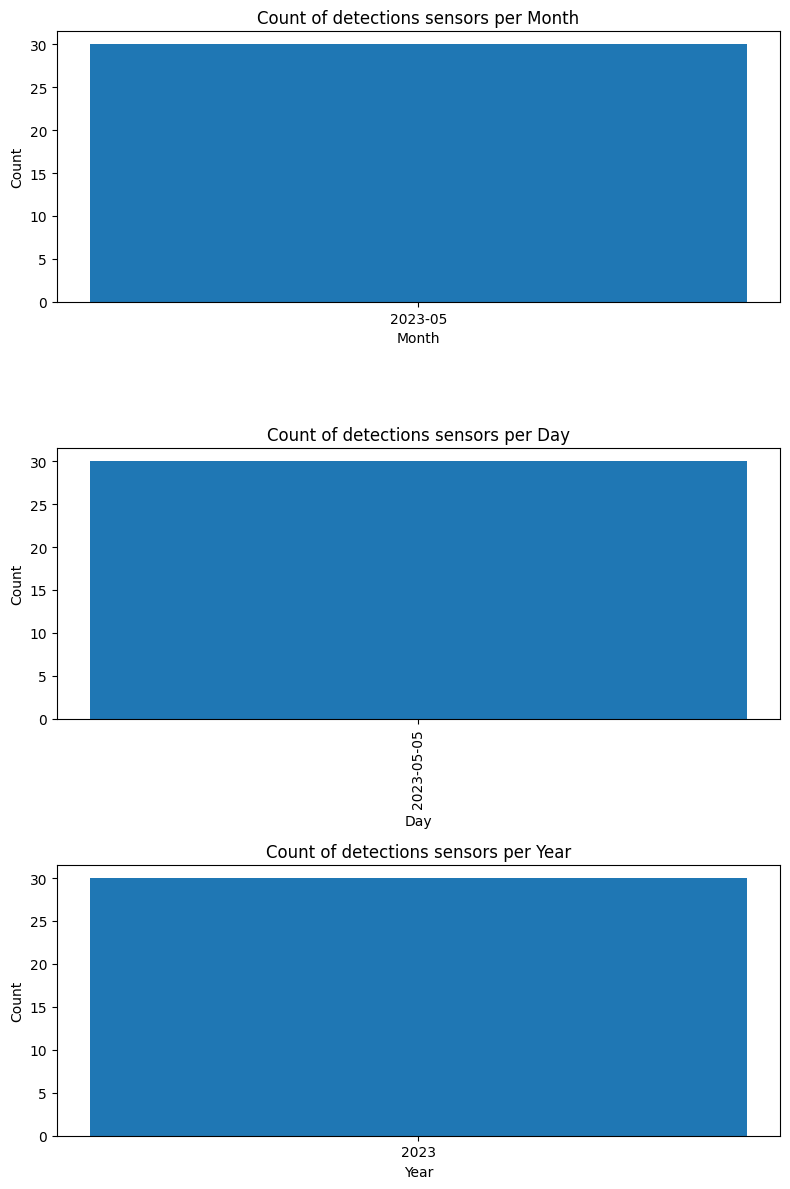

{'0xc2c53acbff55': 10}


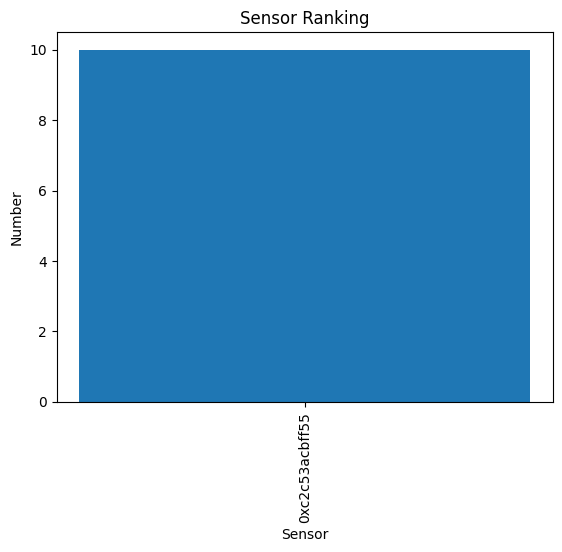

{'0xc2c53acbff55': 10}

In [1]:
import requests
import time
import datetime
now=int(time.time() * 1000)
import matplotlib.pyplot as plt
print(now)

host = 'http://localhost:8080'

#this line of code return all data that we have about our sensors and then we can visualise statistical data related to them
response = requests.get(host + f'/sensors?from=0&to={now}')
if response.status_code == 200:
    # print(response.json())
    sensors = response.json()
    print(sensors)
else:
    print('The server is offline.')
    exit()
timestamps=[]
sensorIds=[]
for sensor in sensors:
    timestamps.append( int(sensor["lastDetection"]))
    sensorIds.append(sensor['id'])
#print(timestamps)
print(sensorIds)


def count_active_per_month_day_year(timestamps):
    # Convert the timestamps to datetime objects
    dates = [datetime.datetime.fromtimestamp(ts/1000) for ts in timestamps]
    
    # Create dictionaries to store the count of data points per month, day, and year
    count_per_month = {}
    count_per_day = {}
    count_per_year = {}
    
    # Loop through the dates and update the counts for each month, day, and year
    for date in dates:
        month = date.strftime('%Y-%m')
        if month in count_per_month:
            count_per_month[month] += 1
        else:
            count_per_month[month] = 1
        
        day = date.strftime('%Y-%m-%d')
        if day in count_per_day:
            count_per_day[day] += 1
        else:
            count_per_day[day] = 1
        
        year = date.strftime('%Y')
        if year in count_per_year:
            count_per_year[year] += 1
        else:
            count_per_year[year] = 1
    
    # Return the count per month, day, and year dictionaries
    return count_per_month, count_per_day, count_per_year


#timestamps = [1620237600000, 1620237601000, 1622840400000, 1622840401000, 1625528800000]
count_per_month, count_per_day, count_per_year = count_active_per_month_day_year(timestamps)

# Extract the counts and labels from the dictionaries
month_counts = list(count_per_month.values())
month_labels = list(count_per_month.keys())

day_counts = list(count_per_day.values())
day_labels = list(count_per_day.keys())

year_counts = list(count_per_year.values())
year_labels = list(count_per_year.keys())

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plot the count of data points per month
ax1.bar(month_labels, month_counts)
ax1.set_title('Count of active sensors per Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')

# Plot the count of data points per day
ax2.bar(day_labels, day_counts)
ax2.set_title('Count of active sensors per Day')
ax2.set_xlabel('Day')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', labelrotation=90)

# Plot the count of data points per year
ax3.bar(year_labels, year_counts)
ax3.set_title('Count of active sensors per Year')
ax3.set_xlabel('Year')
ax3.set_ylabel('Count')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()



#this line of code return all data that we have about each sensors and then we can visualise statistical data related to them
sensorsTimestamps=[]
for sensor in sensorIds:
    responsereader = requests.get(host + f"/readings/{sensor}?from=0&to={now}")
    if responsereader.status_code == 200:
        sensorsTimestamps=sensorsTimestamps+responsereader.json()['timestamp']

    else:
        print('The server is offline.')
        exit()

print(sensorsTimestamps)


timestamps =sensorsTimestamps
count_per_month, count_per_day, count_per_year = count_active_per_month_day_year(timestamps)

# Extract the counts and labels from the dictionaries
month_counts = list(count_per_month.values())
month_labels = list(count_per_month.keys())

day_counts = list(count_per_day.values())
day_labels = list(count_per_day.keys())

year_counts = list(count_per_year.values())
year_labels = list(count_per_year.keys())

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plot the count of data points per month
ax1.bar(month_labels, month_counts)
ax1.set_title('Count of detections sensors per Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')

# Plot the count of data points per day
ax2.bar(day_labels, day_counts)
ax2.set_title('Count of detections sensors per Day')
ax2.set_xlabel('Day')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', labelrotation=90)

# Plot the count of data points per year
ax3.bar(year_labels, year_counts)
ax3.set_title('Count of detections sensors per Year')
ax3.set_xlabel('Year')
ax3.set_ylabel('Count')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()



#show ranking of most activated sensors at each month day and year

#this line of code return all data that we have about each sensors and then we can visualise statistical data related to them
rankings={}
for sensor in sensorIds:
    responsereaders = requests.get(host + f"/readings/{sensor}?from=0&to={now}")
    if responsereaders.status_code == 200:
        
        rankings[f'{sensor}']=len(responsereaders.json()['timestamp'])
    else:
        print('The server is offline.')
        exit()

print(rankings)

def sensor_ranking(sensor_dict):
    sorted_dict = {k: v for k, v in sorted(sensor_dict.items(), key=lambda item: item[1], reverse=True)}

    plt.bar(range(len(sorted_dict)), list(sorted_dict.values()), align='center')
    plt.xticks(range(len(sorted_dict)), list(sorted_dict.keys()))
    plt.xticks(rotation=90)
    plt.xlabel('Sensor')
    plt.ylabel('Number')
    plt.title('Sensor Ranking')
    plt.show()

    return sorted_dict
sensor_ranking(rankings)